<a href="https://colab.research.google.com/github/ovozzx/Study/blob/main/%5BClassification%5D%EB%B6%84%EB%A5%98_%EA%B0%9C%EB%85%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  ✓ scikit-learn

scikit-learn은 몹시 다양한 분류 모델(classification)를 제공
1. Logistic regression (e.g. LASSO, Ridge, ElasticNet)
2. Support Vector Machine (e.g SVM)
3. K-Nearest Neighbors (e.g KNN)
4. Naive Bayes
5. Decision Tree (e.g Random Forest)
6. Multi-layer perceptron (e.g MLP, Neural Network)

각 분류 모델의 성능을 평가(model selection)할 수 있는 방법들도 함께 제공한다.
1. Accuracy
2. Confusion matrix
3. Precision, Recall and F-measure
4. Receiver operating characteristic (AUC-ROC)

# 1. 앙상블 

여러 개의 분류기를 생성하고, 각각의 예측을 결합하여 더 정확한 최종 예측



---



### 1) 대표적 알고리즘

- 랜덤포레스트

- 그래디언트 부스팅


### 2) 학습 유형

- 보팅 :
서로 다른 알고리즘을 가진 분류기를 결합

- 배깅 :
같은 유형의 알고리즘 기반의 분류기를 결합 but 데이터 샘플링을 다르게 학습 ex) 랜덤포레스트

- 부스팅



In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

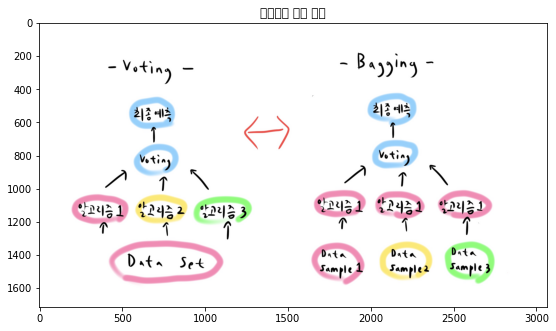

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 

jpgSample = mpimg.imread('IMG_4054.jpg') 


plt.figure(figsize=(20, 15)) 
plt.subplot(2,2,1)
plt.title('보팅과 배깅 차이') 
plt.imshow(jpgSample) 



## 1) 랜덤포레스트(배깅, 트리 기반)

의사결정 나무 기반의 알고리즘


---

- 부트스트래핑 분할 방식 : 개별 트리가 학습하는 데이터 세트의 일부가 중첩되게 샘플링

- n_estimators(디폴트 = 10개) : 몇 개의 결정 트리를 만들 것인지, 트리 수만큼의 데이터 서브세트 만들어짐, 늘릴수록 수행 시간 오래 걸림

- max_features : sqrt(전체 피처 수의 루트값)

- max_depth or max_samples_leaf : 과적합 개선을 위해



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

#2) 부스팅(트리 기반)

여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측
→ 잘못 예측한 데이터에 가중치 부여하여 오류 개선

---

1) AdaBoost(Adaptive boosting)

오류 데이터에 가중치 부여 → 개별 약한 학습기를 모두 결합하여 결과 예측(각각 가중치 부여)




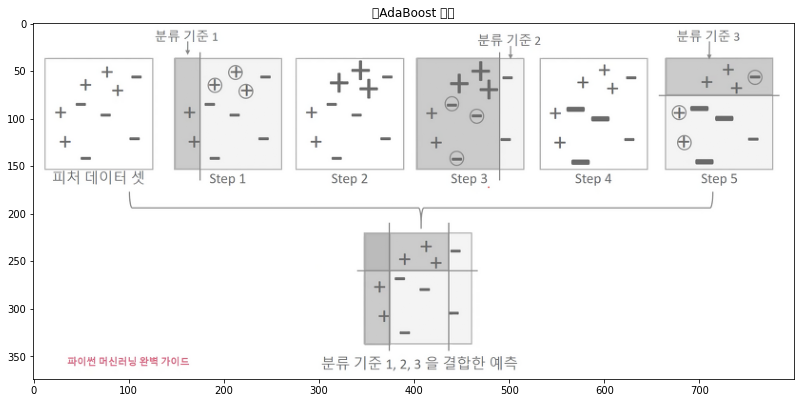

In [2]:

import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 

jpgSample = mpimg.imread('image.png') 


plt.figure(figsize=(30, 20)) 
plt.subplot(2,2,1)
plt.title('AdaBoost 원리') 
plt.imshow(jpgSample)

#예를 들어 첫 번째 학습기에 가중치 0.3, 두 번째 학습기에 가중치 0.5, 세 번째 학습기에 가중치 0.8 부여한 후 모두 결합하는 방식으로 예측!!

2) Gradient Boost

Ada와 비슷하나 가중치 업데이트에서 경사 하강법을 이용

경사하강법 : loss를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트

→ GBM

## (1) GBM(Gradient Boosting Machine)

분류&회귀 모두 가능

랜덤포레스트보다는 예측 성능이 뛰어난 경우가 많음
but 수행 시간 오래 걸리고, 하이퍼 파라미터 튜닝 노력 필요



---




In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

✓ 하이퍼 파라미터 튜닝

- loss : 경사 하강법에 사용할 비용 함수 

- learning_rate : 학습률, 기본값 = 0.1 → 적절한 값(너무 작지도 크지도 않는..), 
lr(작게)&n_estimators(크게) 상호 보완적으로 조합해 사용

- n_estimators : weak learner의 개수, 많을수록 예측 성능 일정 수준까지 증가 but 시간 오래 걸림



In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

## (2) XGBoost(eXtra Gradient Boost)

GBM 기반 but 빠름


회귀에서 뛰어난 예측 성능

-XGBoost 기능

- 교차 검증

- 성능 평가

- 피처 중요도 시각화 모듈

- 조기 중단

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
print(xgb.__version__)

0.90


## (3) LightGBM

XGBoost보다 학습 시간 훨씬 빠름

메모리 사용량도 상대적으로 적음

기능상 다양성 더 많음

리프 중심 트리 분할(균형 X) → 트리 깊이 깊어지므로 하이퍼 파라미터 설정 필요

but 적은 데이터(10000건 이하의 데이터셋)의 경우 과적합 발생 쉬움

